In [26]:
#Importing the library
import psutil
  
# Calling psutil.cpu_precent() for 4 seconds
print('The CPU usage is: ', psutil.cpu_percent(4))

The CPU usage is:  4.1


In [27]:
import os
import psutil

# Getting loadover15 minutes
load1, load5, load15 = psutil.getloadavg()

cpu_usage = (load15/os.cpu_count()) * 100

print("The CPU usage is : ", cpu_usage)


The CPU usage is :  4.4375


In [28]:
# Importing the library
import psutil

# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])


RAM memory % used: 9.5


In [29]:
pip install line_profiler


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 kB 246.8 kB/s eta 0:00:001m260.1 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import splitfolders
cwd = '/home/bishnu/Desktop/ML/googlephoto/'

In [3]:
# Splitting the folders into training, testing and validation 
# The ratio is 60%, 20%, 20%
# The seed is for random sampling 
input_folder =  cwd + '/input_datasets'
output = cwd + '/processed_data'
splitfolders.ratio (input_folder, output, seed= 42, ratio= (0.6, 0.2, 0.2))


Copying files: 138 files [00:01, 73.14 files/s]


In [4]:
help (splitfolders.ratio)

Help on function ratio in module splitfolders.split:

ratio(input, output='output', seed=1337, ratio=(0.8, 0.1, 0.1), group_prefix=None, move=False)



In [5]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import  ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.models import  Sequential
from tensorflow.keras.models import  Model
import matplotlib.pyplot as plt
import numpy as np

2022-08-29 14:36:46.151543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-29 14:36:46.151623: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
img_height, img_width = (224, 224)
batch_size = 32
train_data_dir = cwd + '/processed_data/train'
valid_data_dir = cwd + '/processed_data/val'
test_data_dir = cwd + '/processed_data/test'

In [7]:
train_datagen = ImageDataGenerator (preprocessing_function= preprocess_input,
                                   shear_range = 0.2, zoom_range = 0.2,
                                   horizontal_flip = True, validation_split = 0.4)
train_generator = train_datagen.flow_from_directory (train_data_dir,
                                                    target_size = (img_height, img_width),
                                                    batch_size = 32, class_mode = 'categorical',
                                                    subset = 'training') # set as training data
valid_generator = train_datagen.flow_from_directory (valid_data_dir,
                                                    target_size = (img_height, img_width),
                                                    batch_size = 32, class_mode = 'categorical',
                                                    subset = 'validation') # set as validation data
test_generator = train_datagen.flow_from_directory (test_data_dir,
                                                    target_size = (img_height, img_width),
                                                    batch_size = 1, class_mode = 'categorical',
                                                    subset = 'validation') # set as testing data

Found 50 images belonging to 5 classes.
Found 19 images belonging to 5 classes.
Found 16 images belonging to 5 classes.


In [8]:
x , y = test_generator.next ()
x.shape

(1, 224, 224, 3)

In [9]:
train_generator.num_classes

5

In [ ]:
base_model = ResNet50 (include_top= False, weights= 'imagenet')
x = base_model.output
x = GlobalAveragePooling2D ()(x)
x = Dense (1024, activation = 'relu') (x)
predictions = Dense (train_generator.num_classes, activation = 'softmax') (x)
model = Model (inputs = base_model.input, outputs = predictions)

for layer in base_model.layers:
    layer.trainable = False
model.compile (optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit (train_generator, epochs = 30)

2022-08-29 14:37:40.905638: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-29 14:37:40.905738: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-29 14:37:40.905813: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bishnu-ncuastro): /proc/driver/nvidia/version does not exist
2022-08-29 14:37:40.906885: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
2/2 [==============================] - 4s 711ms/step - loss: 1.4841 - accuracy: 0.3600
Epoch 2/30
2/2 [==============================] - 1s 335ms/step - loss: 0.5247 - accuracy: 0.8400
Epoch 3/30
2/2 [==============================] - 1s 836ms/step - loss: 0.0976 - accuracy: 0.9600
Epoch 4/30
2/2 [==============================] - 1s 330ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 5/30
2/2 [==============================] - 1s 328ms/step - loss: 0.0454 - accuracy: 0.9600
Epoch 6/30
2/2 [==============================] - 1s 846ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 7/30
2/2 [==============================] - 1s 764ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 8/30
2/2 [==============================] - 1s 335ms/step - loss: 9.5460e-04 - accuracy: 1.0000
Epoch 9/30
2/2 [==============================] - 1s 333ms/step - loss: 8.7831e-04 - accuracy: 1.0000
Epoch 10/30
2/2 [==============================] - 1s 331ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 11/30

In [ ]:
model.save (cwd +' Saved_Model/ cmd.h5')

In [22]:
trdt_loss, test_acc = model.evaluate (test_generator, verbose = 2)
print ('Test accuracy', test_acc)

16/16 - 1s - loss: 1.2956e-04 - accuracy: 1.0000 - 1s/epoch - 88ms/step
Test accuracy 1.0


1/1 [==============================] - 0s 32ms/step


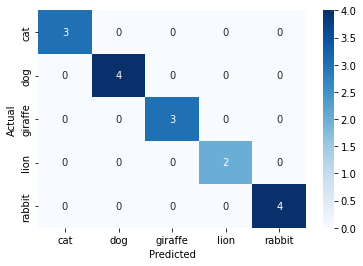

test accuracy: 100.0


<Figure size 432x288 with 0 Axes>

In [23]:
import pandas as pd
import seaborn as sns

import tensorflow as tf
model = tf.keras.models.load_model (cwd + ' Saved_Model/ cmd.h5')
filename = test_generator.filenames
nb_samples = len (test_generator)
y_prob = []
y_act = []
test_generator.reset ()
for _ in range (nb_samples):
    x_test, y_test = test_generator.next ()
    y_prob.append (model.predict (x_test))
    y_act.append (y_test)

predicted_class = [list (train_generator.class_indices.keys ())[i.argmax()] for i in y_prob]
actual_class = [list (train_generator.class_indices.keys ())[i.argmax()] for i in y_act]

out_df = pd.DataFrame (np.vstack ([predicted_class, actual_class]).T, columns = ['predicted_class', 'actual_class'])
confusion_matrix = pd.crosstab (out_df['actual_class'], out_df ['predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap (confusion_matrix, cmap = 'Blues', annot = True, fmt = 'd')
plt.show ()
plt.savefig (cwd + 'accuracy.jpg', dpi = 300)
print ('test accuracy: {}'. format ((np.diagonal (confusion_matrix).sum()/confusion_matrix.sum ().sum()*100)))

In [1]:
import multiprocessing

multiprocessing.cpu_count()

16